In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "../out/airline_cs/random_forest_classifier.csv"
df = pd.read_csv(path)

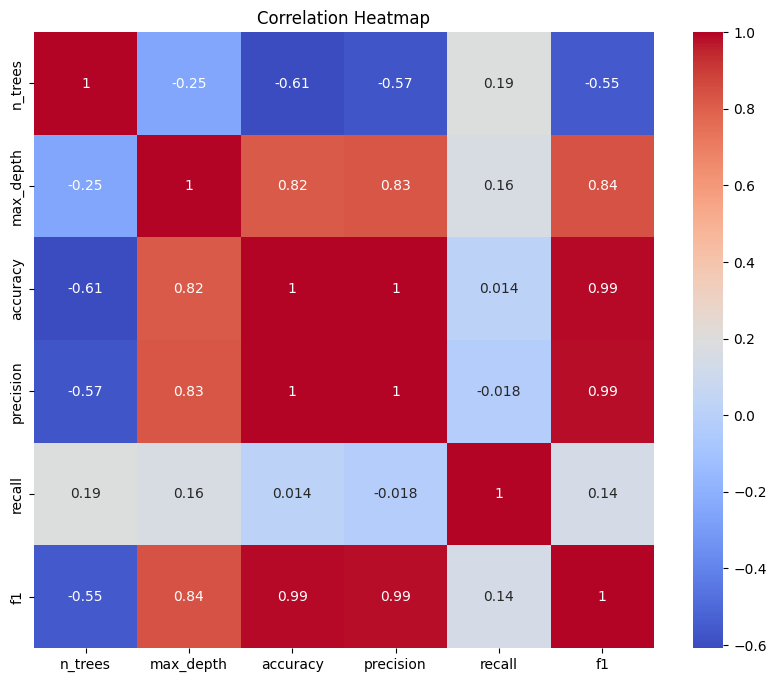

In [10]:

res = df.drop(["max_features", "max_split_values"], axis=1)
corr = res.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [44]:
small_forest = df[(df["n_trees"] >= 10) & (df["n_trees"] <= 50)]
big_forest = df[(df["n_trees"] >= 100) & (df["n_trees"] <= 500)]

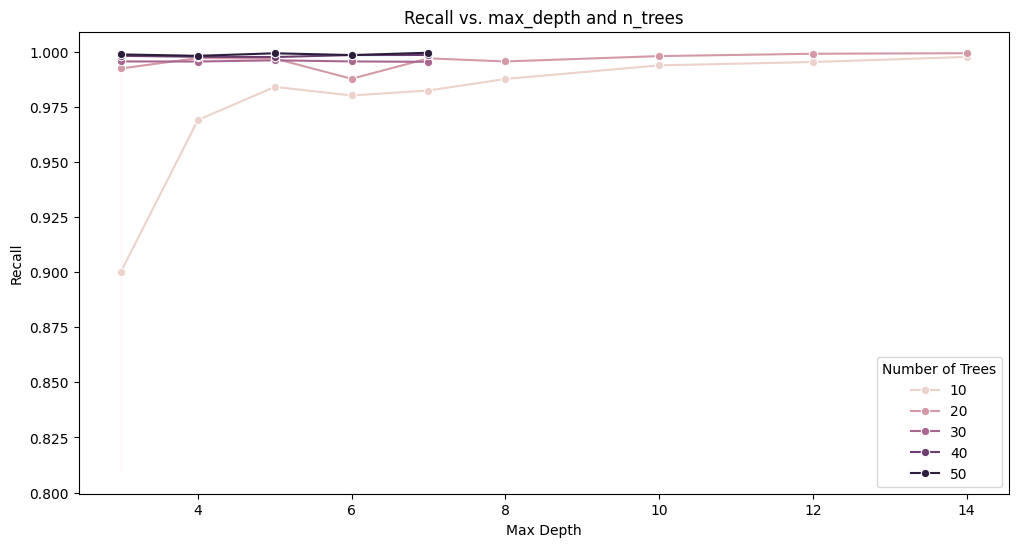

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=small_forest, x="max_depth", y="recall", hue="n_trees", marker="o")
plt.title("Recall vs. max_depth and n_trees")
plt.xlabel("Max Depth")
plt.ylabel("Recall")
plt.legend(title="Number of Trees")
plt.show()

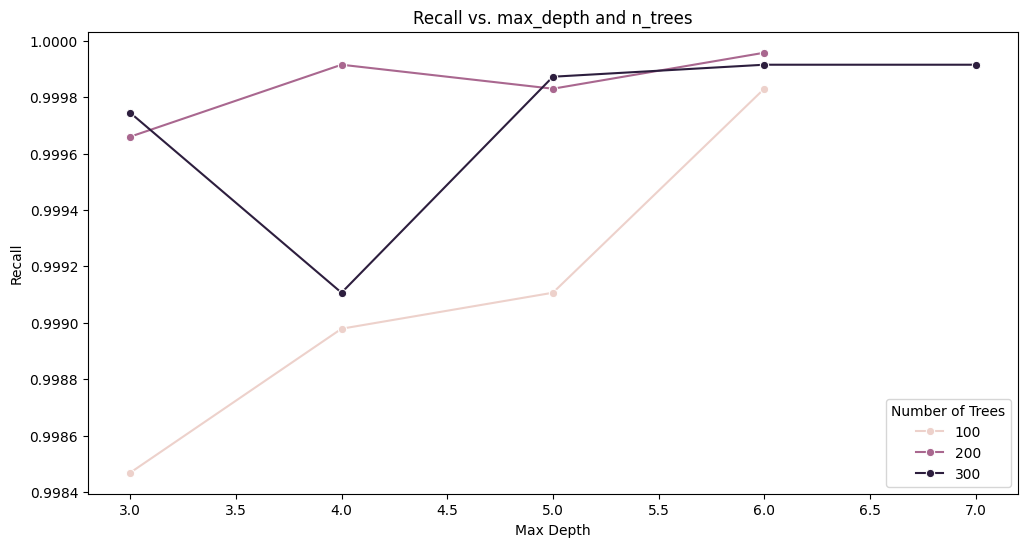

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=big_forest, x="max_depth", y="recall", hue="n_trees", marker="o")
plt.title("Recall vs. max_depth and n_trees")
plt.xlabel("Max Depth")
plt.ylabel("Recall")
plt.legend(title="Number of Trees")
plt.show()

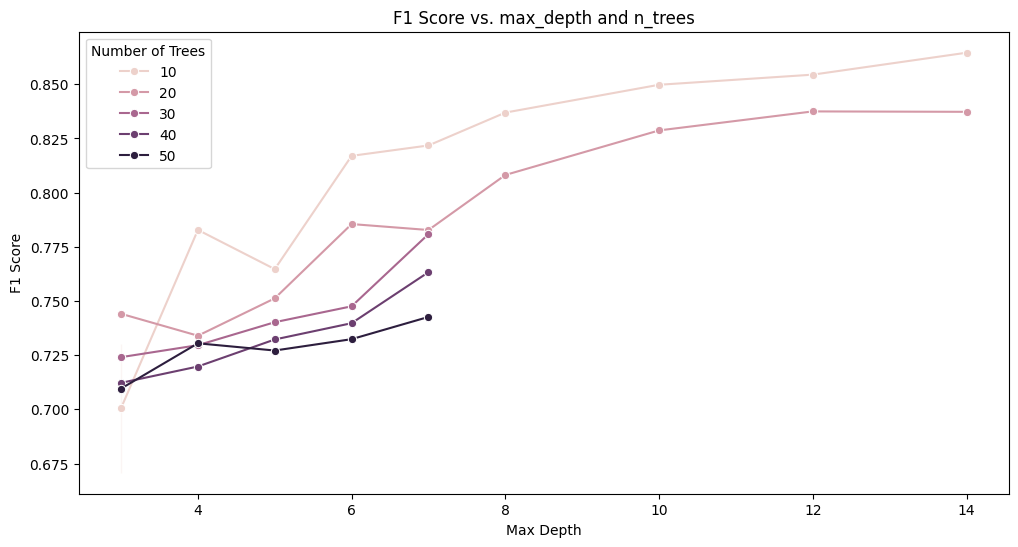

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=small_forest, x="max_depth", y="f1", hue="n_trees", marker="o")
plt.title("F1 Score vs. max_depth and n_trees")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend(title="Number of Trees")
plt.show()

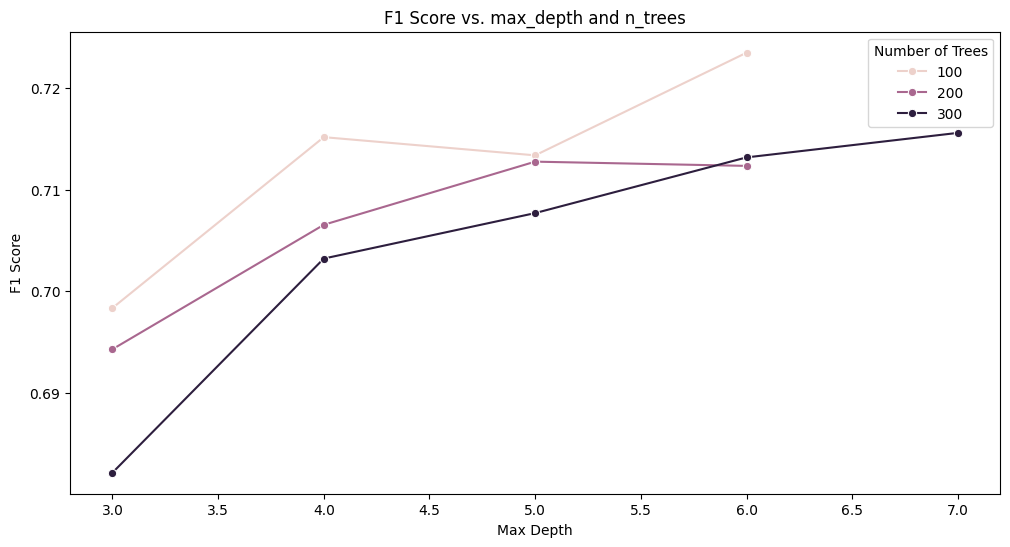

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=big_forest, x="max_depth", y="f1", hue="n_trees", marker="o")
plt.title("F1 Score vs. max_depth and n_trees")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.legend(title="Number of Trees")
plt.show()

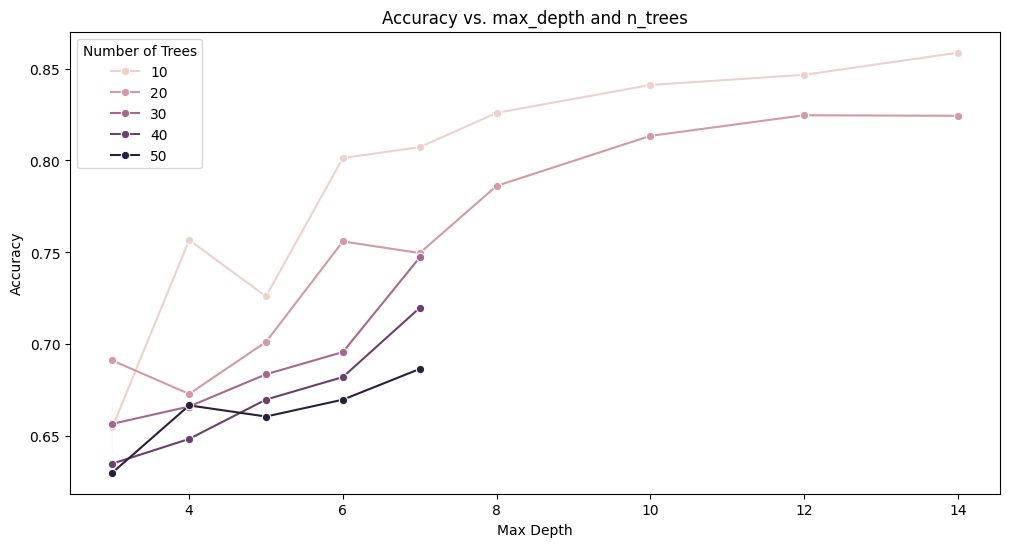

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=small_forest, x="max_depth", y="accuracy", hue="n_trees", marker="o")
plt.title("Accuracy vs. max_depth and n_trees")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(title="Number of Trees")
plt.show()

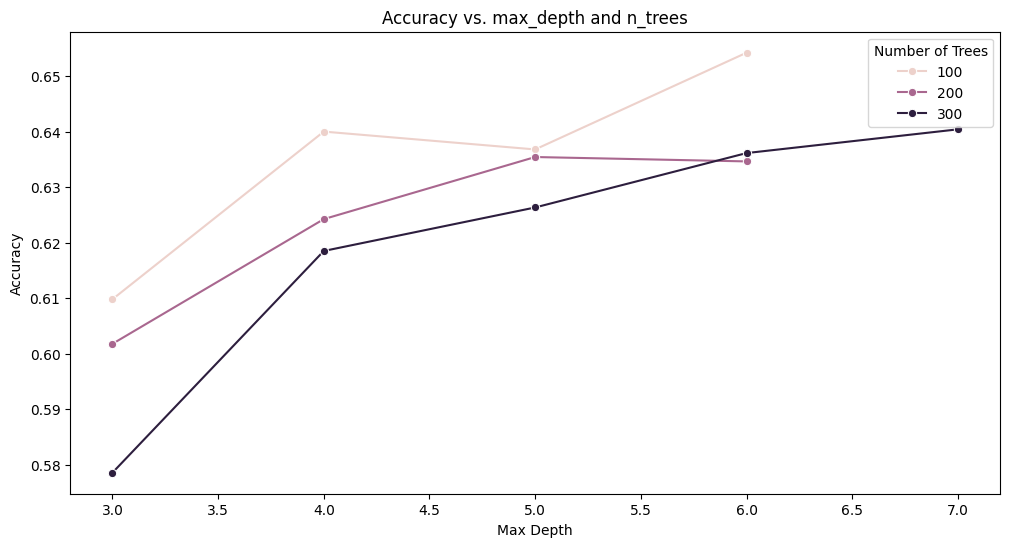

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=big_forest, x="max_depth", y="accuracy", hue="n_trees", marker="o")
plt.title("Accuracy vs. max_depth and n_trees")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend(title="Number of Trees")
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# precision plot
sns.lineplot(ax=axes[0], data=filtered_df, x="max_depth", y="precision", hue="n_trees", marker="o")
axes[0].set_title("precision vs. max_depth and n_trees (10-15)")
axes[0].set_xlabel("Max Depth")
axes[0].set_ylabel("precision")
axes[0].legend(title="Number of Trees")

# Precision plot
sns.lineplot(ax=axes[1], data=filtered_df, x="max_depth", y="precision", hue="n_trees", marker="o")
axes[1].set_title("Precision vs. max_depth and n_trees (10-15)")
axes[1].set_xlabel("Max Depth")
axes[1].set_ylabel("Precision")
axes[1].legend(title="Number of Trees")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()